In [1]:
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt

In [2]:
def GetRelevantTrackingData(fname):
    DLC_track = glob.glob(path_for_DLCAnnotation + '\\'+ fname + 'DeepCut_' +  '*.h5')[0]
    temp = pd.read_hdf(DLC_track)
    DLC = temp.loc[slice(None),(slice(None),'proboscisTip')]

    manual_track = pd.read_csv(path_for_manualAnnotation + '//DLTdv6_data_' + fname + 'xypts.csv')
    
    return(DLC, manual_track)

In [3]:
def GetRMSE(x2, y2, x1, y1):
    from scipy.spatial.distance import pdist

    er = []
    for idx in range(len(x2)):
        X = np.asarray([[x1[idx], y1[idx]], 
                         [x2[idx], y2[idx]]])
        temp_er = pdist(X,metric = 'euclidean')
        er.append(temp_er[0])
    er = np.asarray(er)
    return(er)

In [4]:
# def DrawTracks(manual, dlc, zoomInStart, zoomInStop):
#     fig, ax = plt.subplots(2,1, figsize = (6,10))

#     ax[0].plot(manual, label = 'manually tracked')
#     ax[0].plot(dlc, label = 'DLC')
#     ax[0].legend()
#     # plt.show()

#     ax[1].plot(manual[zoomInStart:zoomInStop], marker = 'o', label = 'manually tracked')
#     ax[1].plot(dlc[zoomInStart:zoomInStop], marker = 'o', label = 'DLC')
#     ax[1].legend()
# #     plt.show()
#     return(fig, ax)

In [4]:
def DrawDistribution(error, df):
    import seaborn as sns

    er = error
    fig, ax = plt.subplots()
    sns.distplot(er[~np.isnan(er)])
    plt.axvline(x = df.rmse.mean(), color = 'gold', 
                label = 'mean %.2f' %df.rmse.mean())
    plt.axvline(x = df.rmse.mean() + df.rmse.std(ddof = 0), color = 'orange', 
                label = '1 std %.2f' % (df.rmse.mean() + df.rmse.std(ddof = 0)))
    plt.axvline(x = df.rmse.mean() + 2*df.rmse.std(ddof = 0), color = 'brown', 
                label = '2 std %0.3f' % (df.rmse.mean() + 2*df.rmse.std(ddof = 0)))
    plt.legend()
    return(fig, ax)

In [5]:
def DrawFractions(fraction_included, xticklabel):
    ind = np.arange(len(fraction_included))

    rect = np.asarray(fraction_included)*100
    
    fig, ax = plt.subplots()
    plt.bar(ind, rect, width = 0.4)
    plt.xticks(ind, xticklabel)
    for ind, rect in zip(ind, rect):
        plt.text(ind, 0.90*rect, '%.2f' %rect, 
            ha = 'center', va = 'bottom', 
                color = 'white')
    return(fig, ax)

In [6]:
path_for_videos = '../dataFolders/ManuallyAnnotatedVideos/FullLengthVideos/'
videoList = glob.glob(path_for_videos + '/*.mp4')

In [7]:
path_for_manualAnnotation = "G:\My Drive\Tom-Tanvi\Shared With Bing,Tom and Tanvi\Moth Annotations\Tip Manual Digitization"
path_for_DLCAnnotation = 'G:\My Drive\Tom-Tanvi\Shared With Bing,Tom and Tanvi\Video Analysis\DeepLabCut-ImageAnalysis\\take5\outputFromDLC\VideoResults\FullVideos'

In [8]:
path_frame_Reference = glob.glob(path_for_manualAnnotation + '\\'+ '*DigitizingChart.xlsx')
frame_Reference = pd.read_excel(path_frame_Reference[0])
frame_Reference.loc[frame_Reference.trial == 0, 'trial'] = 'first'
frame_Reference.head()

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [8]:
name = []
for video in videoList:
    head, tail = os.path.split(video)
    name.append(tail[:-4])

In [9]:
for fname in name[0:1]:
    dlc_track, manual_track = GetRelevantTrackingData(fname)
    
    for section in ['first', 'last']:
        relevant_df = frame_Reference[(frame_Reference.Name == fname) & 
                                          (frame_Reference.trial == section)]
        fstart = relevant_df.loc[:,'Digitized Start'].values[0]
        fstop = relevant_df.loc[:,'Digitized Stop'].values[0]

        manual_x = manual_track.loc[fstart:fstop, 'pt4_cam1_X'].values
        manual_y = manual_track.loc[fstart:fstop, 'pt4_cam1_Y'].values
        manual_y = 488 - manual_y

        idx = pd.IndexSlice
        dlc_x = dlc_track.loc[idx[fstart:fstop], idx[:,:,'x']].values.squeeze()
        dlc_y = dlc_track.loc[idx[fstart:fstop], idx[:,:,'y']].values.squeeze()
        dlc_likelihood = dlc_track.loc[idx[fstart:fstop], idx[:,:,'likelihood']].values.squeeze()
        
        
        error_manual = GetRMSE(manual_x[1:], manual_y[1:], manual_x[:-1], manual_y[:-1])
        print(error_manual.shape)
        error_manual = np.concatenate((np.array([np.nan]), error_manual))
        print(error_manual.shape)
        error_dlc = GetRMSE(dlc_x[1:], dlc_y[1:], dlc_x[:-1], dlc_y[:-1])
        error_dlc = np.concatenate((np.array([np.nan]), error_dlc))
        df = pd.DataFrame({'rmse_manual': error_manual, 'rmse_dlc': error_dlc})
#         df['zscore'] = (df.rmse - df.rmse.mean())/df.rmse.std(ddof = 0)

(1420,)
(1421,)
(660,)
(661,)


In [14]:
for fname in name:
    dlc_track, manual_track = GetRelevantTrackingData(fname)
    
    for section in ['first', 'last']:
        relevant_df = frame_Reference[(frame_Reference.Name == fname) & 
                                          (frame_Reference.trial == section)]
        fstart = relevant_df.loc[:,'Digitized Start'].values[0]
        fstop = relevant_df.loc[:,'Digitized Stop'].values[0]

        manual_x = manual_track.loc[fstart:fstop, 'pt4_cam1_X'].values
        manual_y = manual_track.loc[fstart:fstop, 'pt4_cam1_Y'].values
        manual_y = 488 - manual_y

        idx = pd.IndexSlice
        dlc_x = dlc_track.loc[idx[fstart:fstop], idx[:,:,'x']].values.squeeze()
        dlc_y = dlc_track.loc[idx[fstart:fstop], idx[:,:,'y']].values.squeeze()
        dlc_likelihood = dlc_track.loc[idx[fstart:fstop], idx[:,:,'likelihood']].values.squeeze()
        
        
        error_manual = GetRMSE(manual_x[1:], manual_y[1:], manual_x[:-1], manual_y[:-1])
        error_manual = np.concatenate((np.array([np.nan]), error_manual))
        error_dlc = GetRMSE(dlc_x[1:], dlc_y[1:], dlc_x[:-1], dlc_y[:-1])
        error_dlc = np.concatenate((np.array([np.nan]), error_dlc))
        df = pd.DataFrame({'rmse_manual': error_manual, 'rmse_dlc': error_dlc})
        
        # compile everything together
        s1 = pd.Series(data = manual_x, name = 'manual_x')
        s2 = pd.Series(data = manual_y, name = 'manual_y')
        s3 = pd.Series(data = dlc_x, name = 'dlc_x')
        s4 = pd.Series(data = dlc_y, name = 'dlc_y')
        s5 = pd.Series(data = dlc_likelihood, name = 'dlc_likelihood')
        
        compiled_df = pd.concat([s1, s2, s3, s4, s5], axis = 1).reset_index()
        compiled_df = pd.concat([compiled_df, df], axis = 1).reset_index()
        
        compiled_df.to_csv('../dataFolders/Tracking Errors/version2-usingSuccessiveFrames/' + fname + '_' + section + '.csv', 
                           index = False)

## Start here if you have run this before!

In [6]:
# do error analysis on all data

datalist = glob.glob('../dataFolders/Tracking Errors/version2-usingSuccessiveFrames/**.csv', recursive=True)

In [7]:
len(datalist)

24

In [8]:
uber_man_error = np.asarray([np.nan])
uber_dlc_error = np.asarray([np.nan])

for data in datalist:
    file = pd.read_csv(data)
    
    manual_error = file.loc[:,'rmse_manual'].values
    uber_man_error = np.concatenate([uber_man_error, manual_error])
    
    dlc_error = file.loc[:,'rmse_dlc'].values
    uber_dlc_error = np.concatenate([uber_dlc_error, dlc_error])
    
uber_man_error = uber_man_error[1:]
uber_dlc_error = uber_dlc_error[1:]

len(uber_man_error), len(uber_dlc_error)

(10308, 10308)

In [13]:
def add_subplot_axes(ax,rect,axisbg):
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)
    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height],facecolor=axisbg)
    
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]*2
    y_labelsize *= rect[3]*2
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax

In [90]:
x_labelsize = ax[0].get_xticklabels()[0].get_size()
x_labelsize 

10.0

## plot the error distribution for dlc data

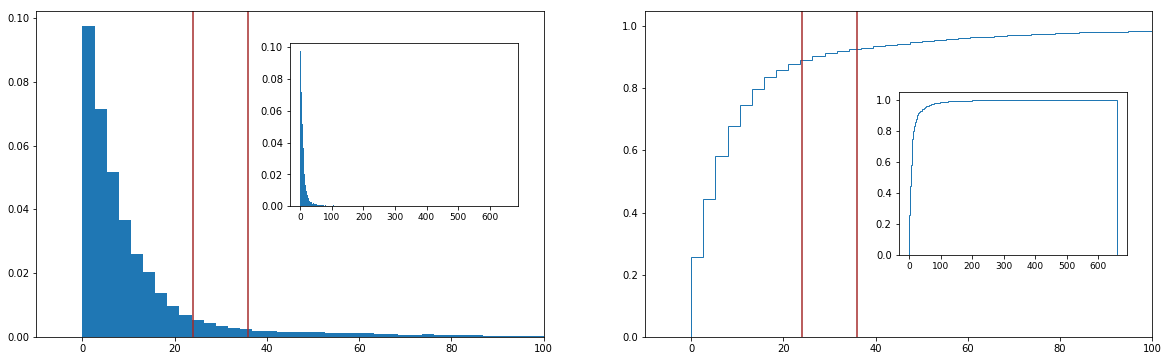

In [26]:
import seaborn as sns
er = uber_dlc_error

fig, ax = plt.subplots(1,2, figsize = (20,6))
ax = ax.ravel()

nbins = 250
_, bin_hist, _ = ax[0].hist(er[~np.isnan(er)], bins = nbins, density = True)
ax[0].set_xlim([-10, 100])

cutoff = 24
ax[0].axvline(x = cutoff, color = 'brown')
ax[0].axvline(x = 36, color = 'brown')

# These are in unitless percentages of the figure size. (0,0 is bottom left)
# left, bottom, width, height = [0.45, 0.4, 0.3, 0.4]
rect = [0.5, 0.4, 0.45, 0.5]
ax2 = add_subplot_axes(ax[0], rect, axisbg = 'w')
_,_,_ = ax2.hist(er[~np.isnan(er)], bins = nbins, density = True)

_, _, _ = ax[1].hist(er[~np.isnan(er)], bins = nbins, density = True, cumulative = True, 
                    histtype = 'step')
ax[1].axvline(x = cutoff, color = 'brown')
ax[1].axvline(x = 36, color = 'brown')
ax[1].set_xlim([-10, 100])

rect = [0.5, 0.25, 0.45, 0.5]
ax3 = add_subplot_axes(ax[1], rect, axisbg = 'w')
_,_,_ = ax3.hist(er[~np.isnan(er)], bins = nbins, density = True, cumulative = True, 
                histtype = 'step')

fig.savefig('../dataFolders/Figures/Tracking Errors/Compare Thresholds/' + 'DlC_succesiveFrames_RMSE.png')

# plot the error distirubution for the manually tracked data

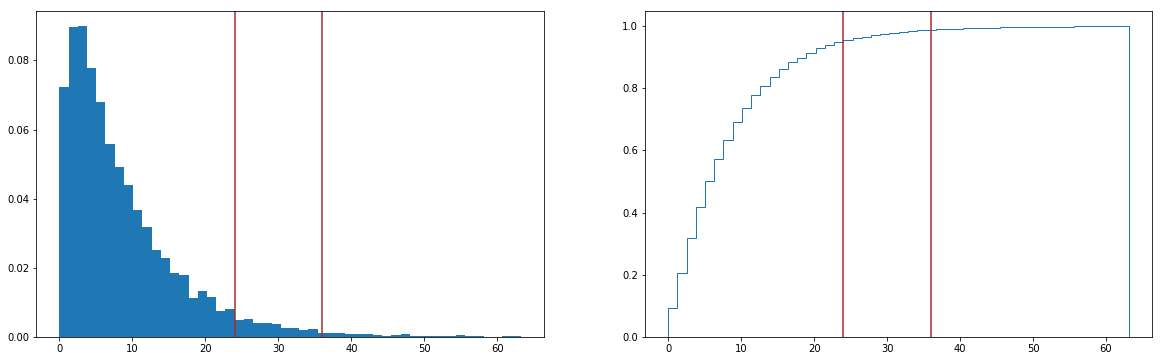

In [27]:
import seaborn as sns
er = uber_man_error

fig, ax = plt.subplots(1,2, figsize = (20,6))
ax = ax.ravel()

nbins = 50
_, bin_hist, _ = ax[0].hist(er[~np.isnan(er)], bins = nbins, density = True)
# ax[0].set_xlim([-10, 100])

cutoff = 24
ax[0].axvline(x = cutoff, color = 'brown')
ax[0].axvline(x = 36, color = 'brown')

_, _, _ = ax[1].hist(er[~np.isnan(er)], bins = nbins, density = True, cumulative = True, 
                    histtype = 'step')
ax[1].axvline(x = cutoff, color = 'brown')
ax[1].axvline(x = 36, color = 'brown')

fig.savefig('../dataFolders/Figures/Tracking Errors/Compare Thresholds/' + 'ManuallyTracked_succesiveFrames_RMSE.png')

## plot for the manual versus dlc data

In [17]:
# do error analysis on all data

datalist = glob.glob('../dataFolders/Tracking Errors/**.csv')
len(datalist)

24

In [19]:
uber_error = np.asarray([np.nan])

for data in datalist:
    file = pd.read_csv(data)
    
    error = file.loc[:,'rmse'].values
    uber_error = np.concatenate([uber_error, error])
    
uber_error = uber_error[1:]

len(uber_error)

10308

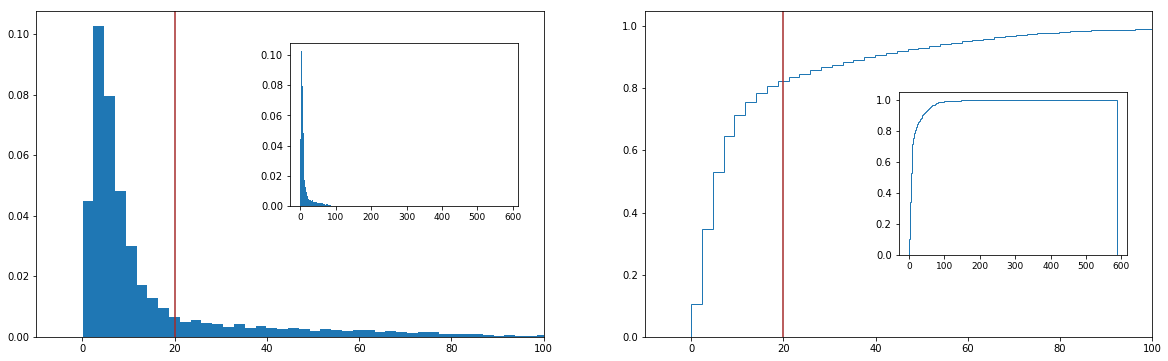

In [28]:
er = uber_error

fig, ax = plt.subplots(1,2, figsize = (20,6))
ax = ax.ravel()

nbins = 250
_, bin_hist, _ = ax[0].hist(er[~np.isnan(er)], bins = nbins, density = True)
ax[0].set_xlim([-10, 100])

cutoff = 20
ax[0].axvline(x = cutoff, color = 'brown')


# These are in unitless percentages of the figure size. (0,0 is bottom left)
# left, bottom, width, height = [0.45, 0.4, 0.3, 0.4]
rect = [0.5, 0.4, 0.45, 0.5]
ax2 = add_subplot_axes(ax[0], rect, axisbg = 'w')
_,_,_ = ax2.hist(er[~np.isnan(er)], bins = nbins, density = True)

_, _, _ = ax[1].hist(er[~np.isnan(er)], bins = nbins, density = True, cumulative = True, 
                    histtype = 'step')
ax[1].axvline(x = cutoff, color = 'brown')
ax[1].set_xlim([-10, 100])

rect = [0.5, 0.25, 0.45, 0.5]
ax3 = add_subplot_axes(ax[1], rect, axisbg = 'w')
_,_,_ = ax3.hist(er[~np.isnan(er)], bins = nbins, density = True, cumulative = True, 
                histtype = 'step')

fig.savefig('../dataFolders/Figures/Tracking Errors/Compare Thresholds/' + 'DlC_versus_Manual_RMSE.png')

In [29]:
fraction_included = []
for cutoff in [24, 24, 20]:
    ff = len(uber_dlc_error[uber_dlc_error < cutoff])/len(uber_dlc_error)
#     ff = len(df[(df.zscore < std) & (df.zscore.notna())])/len(df[df.zscore.notna()])
    fraction_included.append(ff)

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until


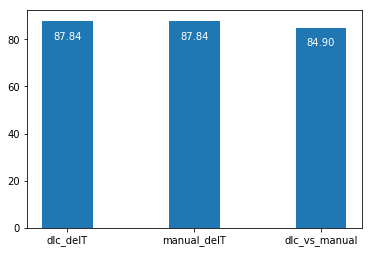

In [33]:
xticklabel = ['dlc_delT', 'manual_delT', 'dlc_vs_manual']
ffractions, _ = DrawFractions(fraction_included, xticklabel)
ffractions.savefig('../dataFolders/Figures/Tracking Errors/Compare thresholds' + '/fractionIncuded.png')

In [148]:
thresh = np.arange(16,48,4)
thresh

array([16, 20, 24, 28, 32, 36, 40, 44])

In [149]:
fraction = []
median_error = []
for pixel_dist in thresh:
    subset = dlc_error[dlc_error < pixel_dist]
    median_rmse = np.median(subset)
    frac = len(subset)/len(dlc_error)
    fraction.append(frac)
    median_error.append(median_rmse)

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in less
  after removing the cwd from sys.path.


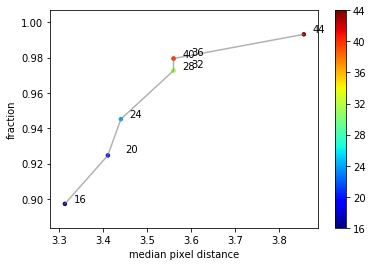

In [155]:
plt.scatter(median_error,fraction, s=12, c = thresh, cmap = plt.cm.get_cmap('jet'))
plt.plot(median_error, fraction, '-', alpha = 0.6, color = 'grey')
cbar = plt.colorbar(ticks = thresh)
plt.ylabel('fraction')
plt.xlabel('median pixel distance')
for i, t in enumerate(thresh):
    jitter = np.random.randint(1,4, size = 1)[0]
    plt.annotate(t, (median_error[i] + jitter/50, fraction[i] + jitter/1000))

plt.savefig('../dataFolders/Figures/Tracking Errors/ParetoFront.png')

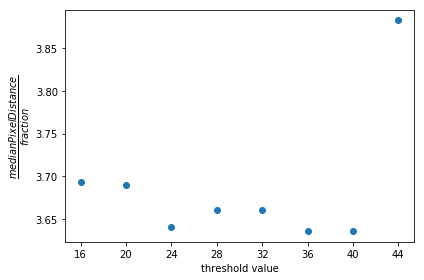

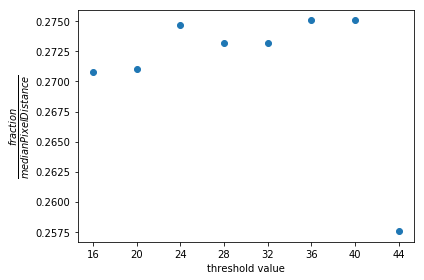

In [161]:
plt.plot(thresh, np.divide(median_error,fraction), 'o')
plt.ylabel(r'$\frac{median Pixel Distance}{fraction}$', fontsize = 14)
plt.xlabel('threshold value')
plt.xticks(thresh)
plt.tight_layout()
plt.savefig('../dataFolders/Figures/Tracking Errors/DistanceOverFraction.png')
plt.show()

plt.plot(thresh, np.divide(fraction, median_error), 'o')
plt.ylabel(r'$\frac{fraction}{median Pixel Distance}$', fontsize = 14)
plt.xlabel('threshold value')
plt.xticks(thresh)
plt.tight_layout()
plt.savefig('../dataFolders/Figures/Tracking Errors/fractionOverDistance.png')
plt.show()


could not create ../dataFolders/Figures/Tracking Errors/c-10_m11\ path


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


could not create ../dataFolders/Figures/Tracking Errors/c-10_m11\ path


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


could not create ../dataFolders/Figures/Tracking Errors/c-10_m3\ path


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


could not create ../dataFolders/Figures/Tracking Errors/c-10_m6\ path


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


could not create ../dataFolders/Figures/Tracking Errors/c-1_m13\ path


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


could not create ../dataFolders/Figures/Tracking Errors/c-1_m2\ path


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


could not create ../dataFolders/Figures/Tracking Errors/c-1_m6\ path


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


could not create ../dataFolders/Figures/Tracking Errors/c-2_m1\ path


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


could not create ../dataFolders/Figures/Tracking Errors/c-2_m11\ path


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


could not create ../dataFolders/Figures/Tracking Errors/c-2_m5\ path


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


could not create ../dataFolders/Figures/Tracking Errors/c-3_m1\ path


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


could not create ../dataFolders/Figures/Tracking Errors/c-3_m10\ path


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


could not create ../dataFolders/Figures/Tracking Errors/c-3_m6\ path


C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


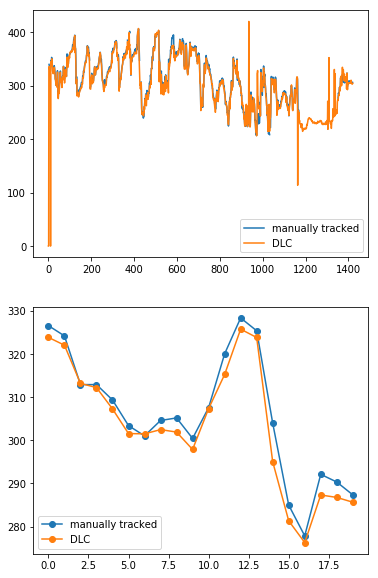

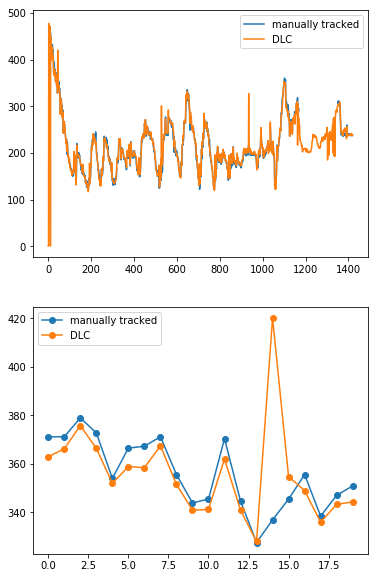

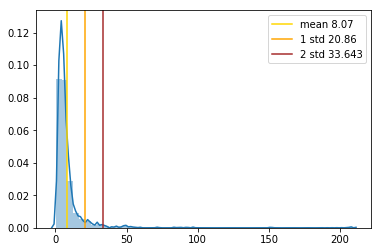

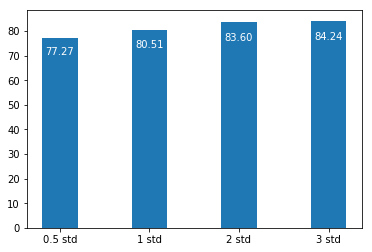

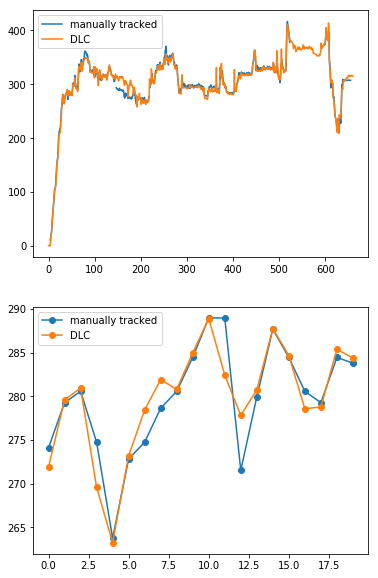

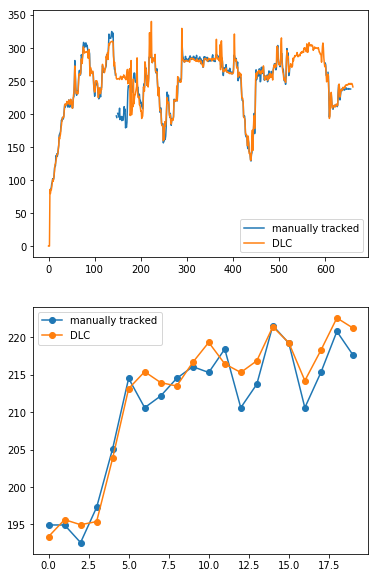

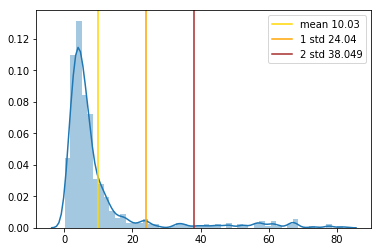

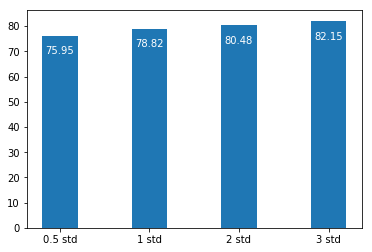

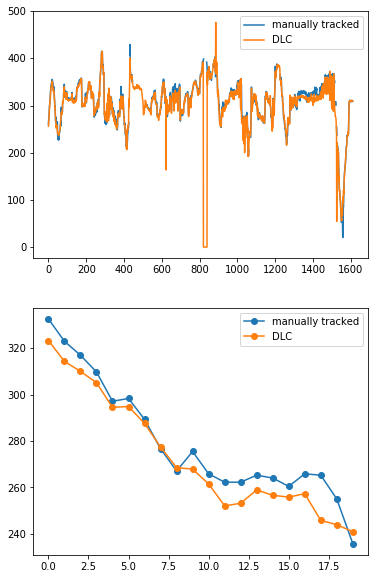

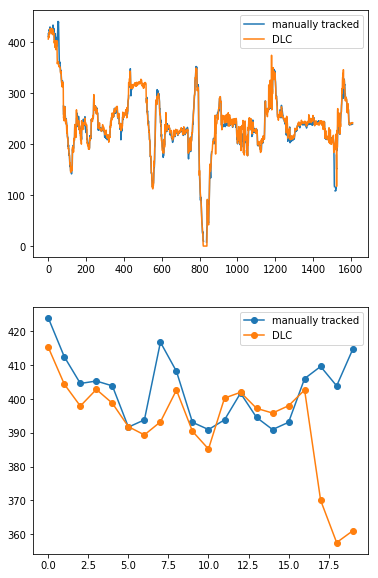

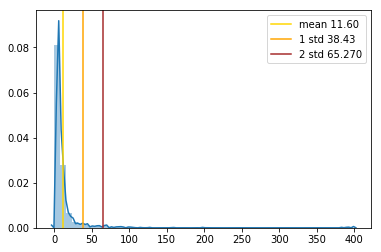

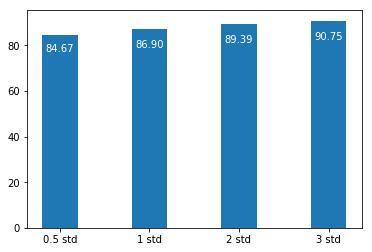

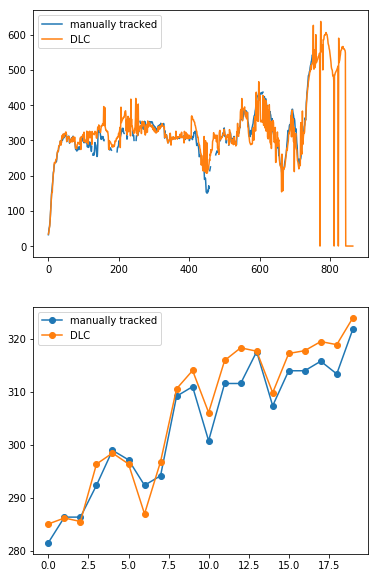

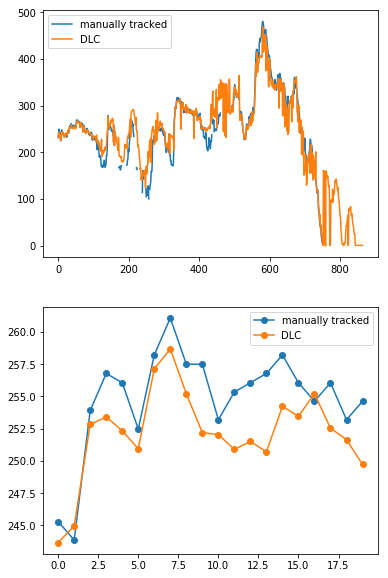

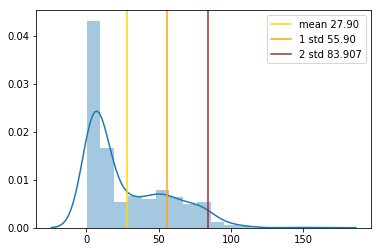

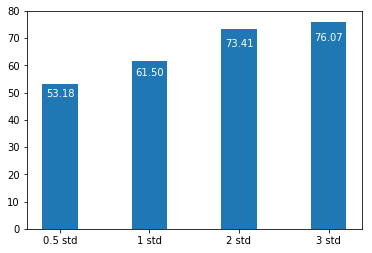

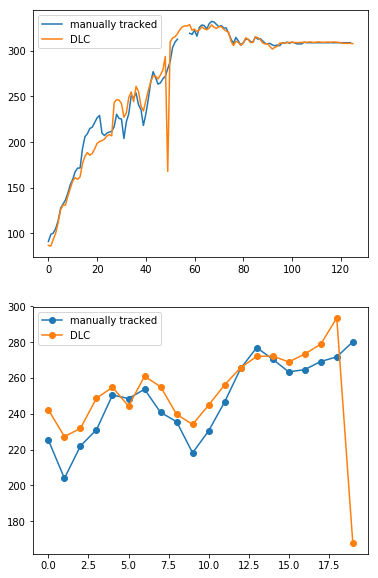

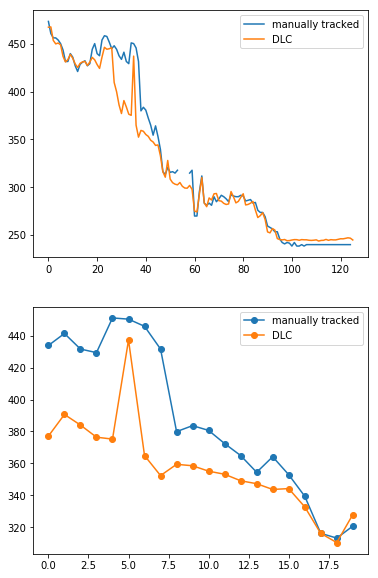

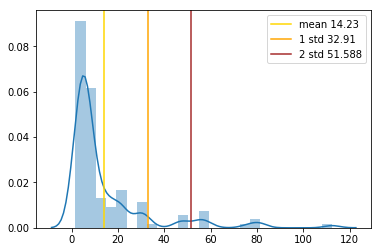

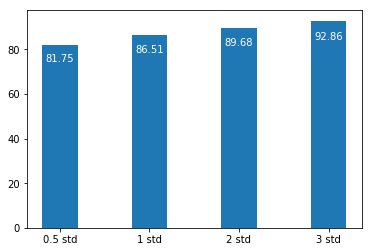

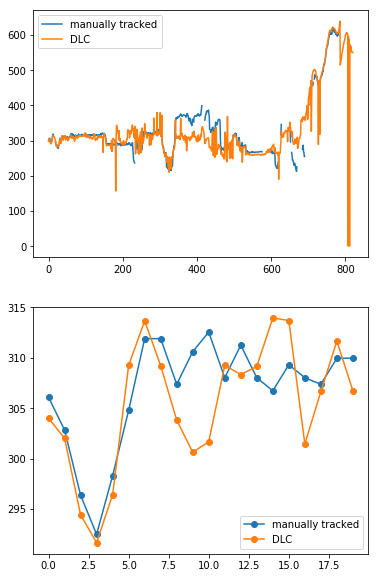

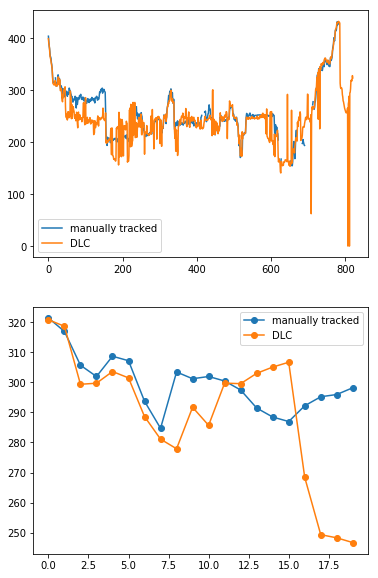

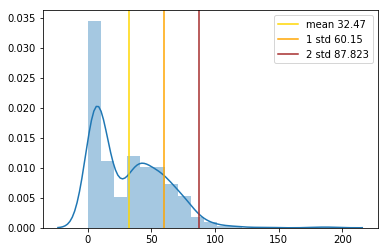

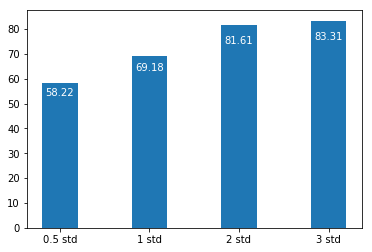

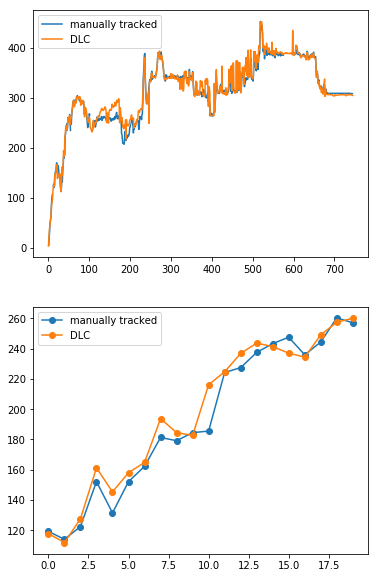

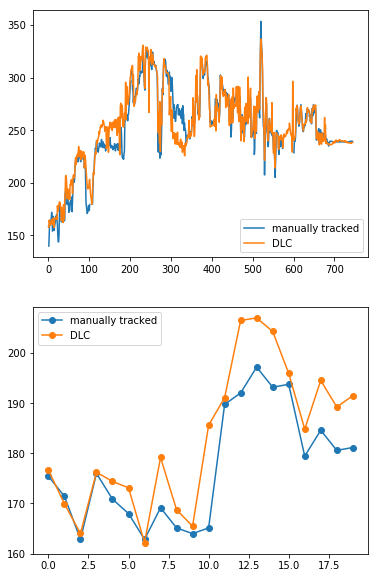

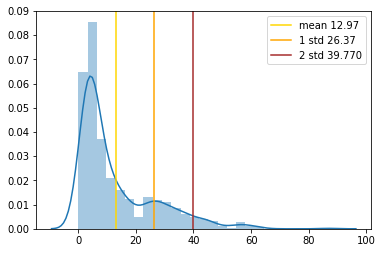

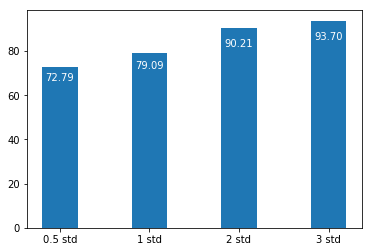

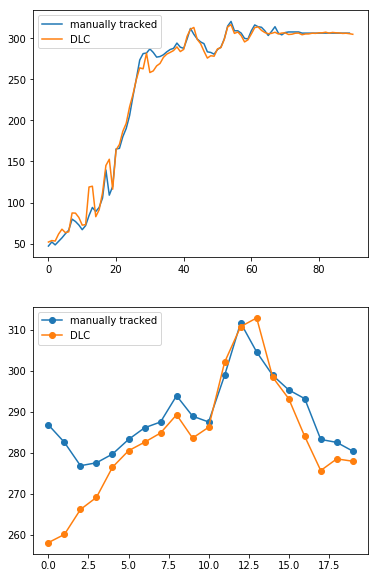

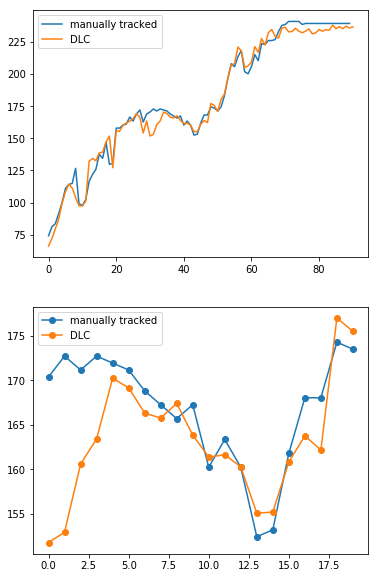

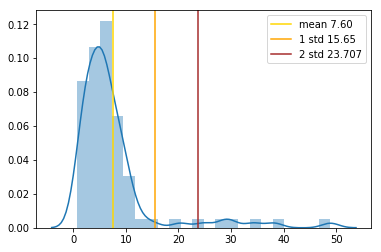

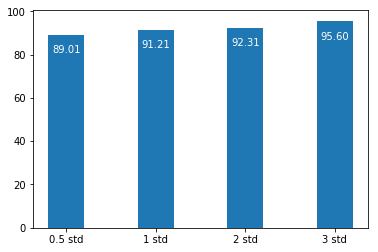

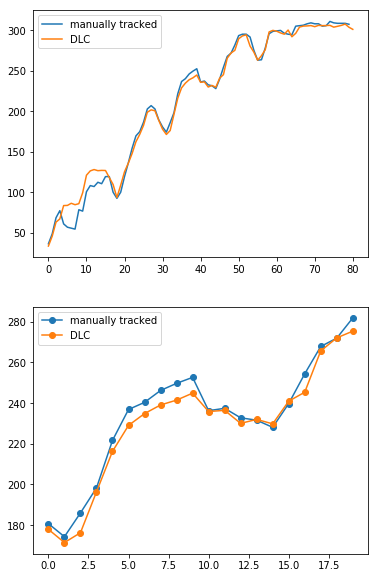

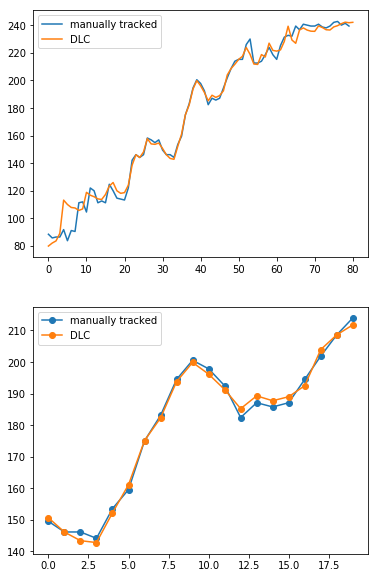

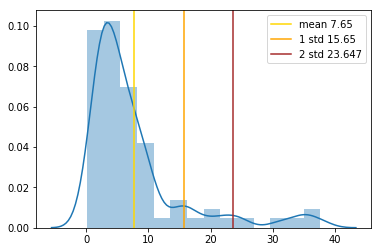

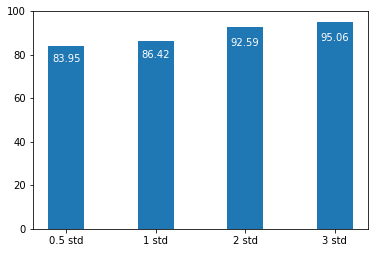

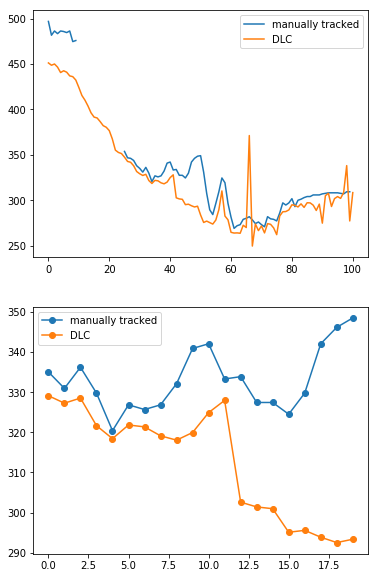

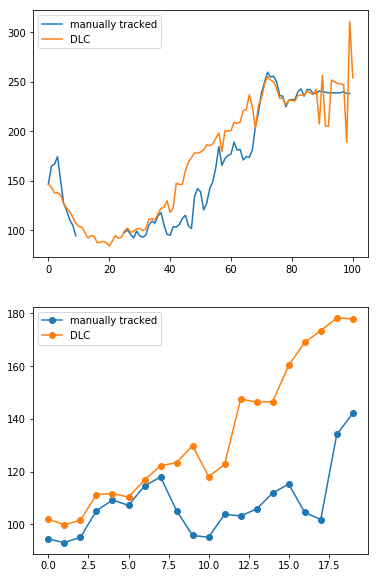

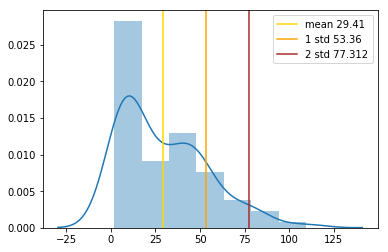

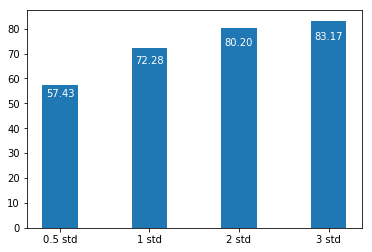

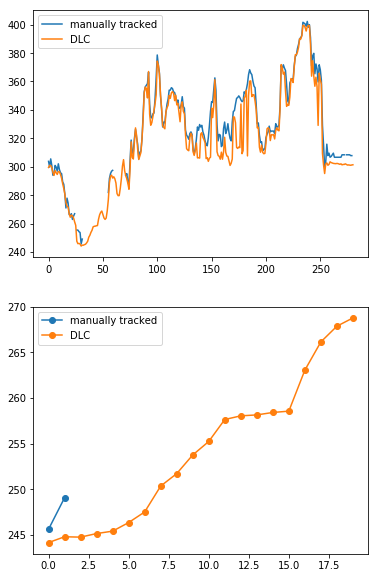

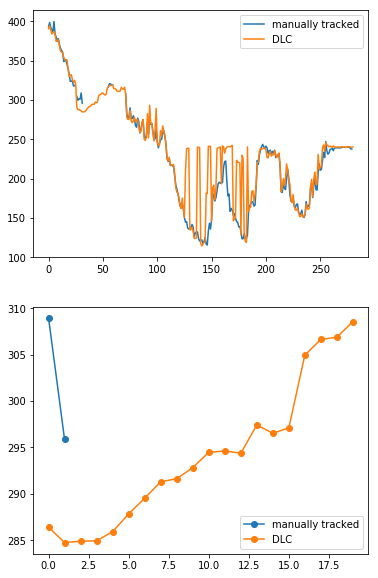

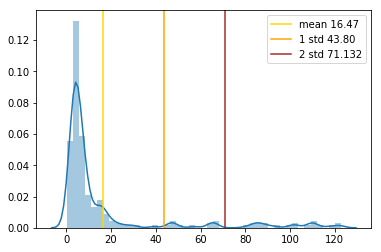

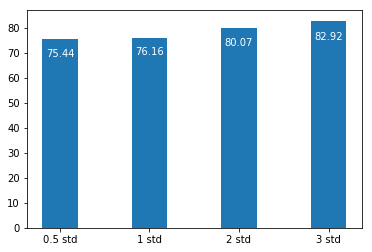

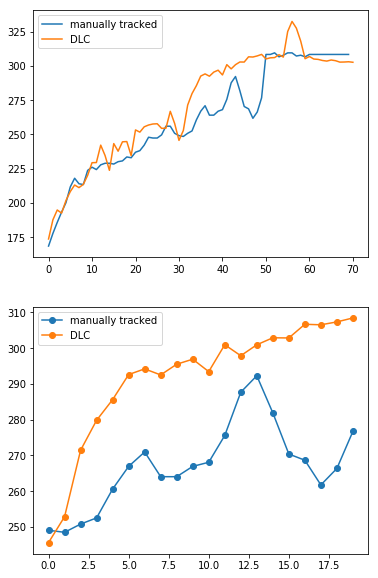

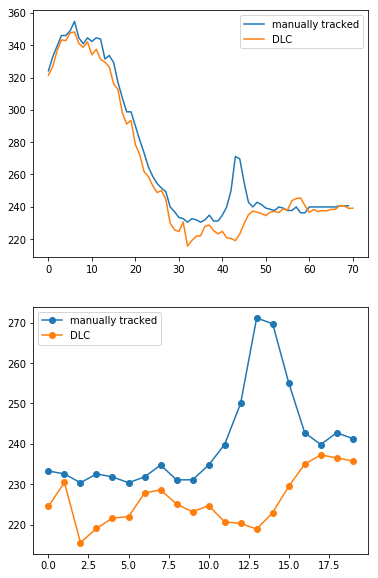

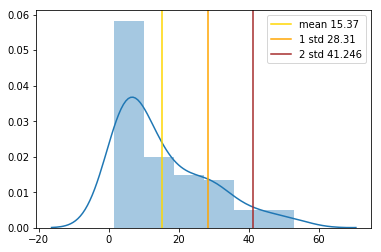

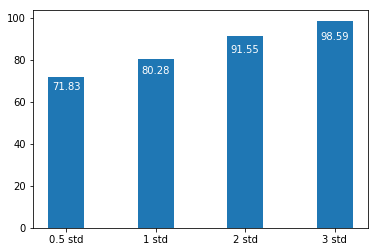

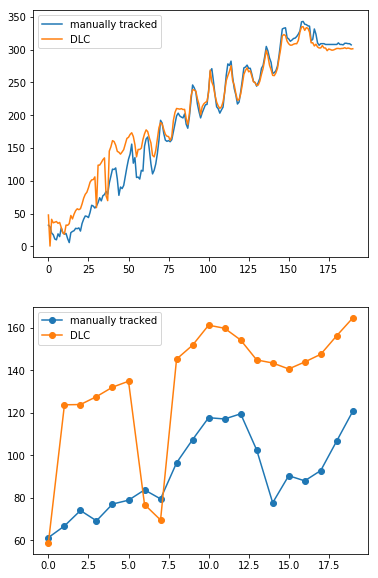

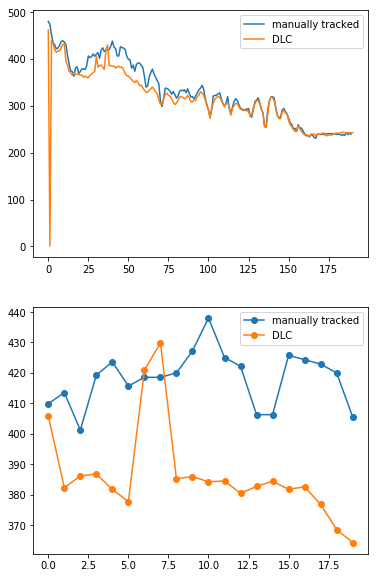

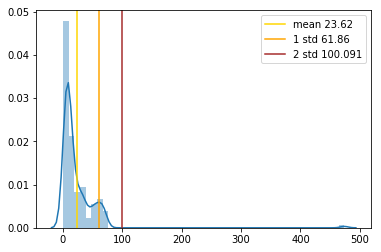

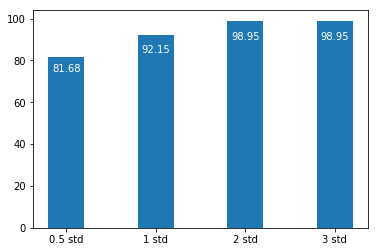

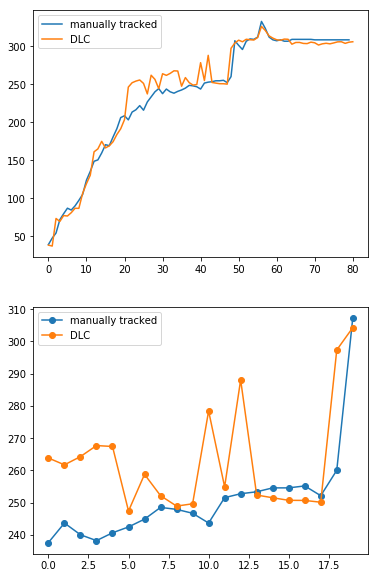

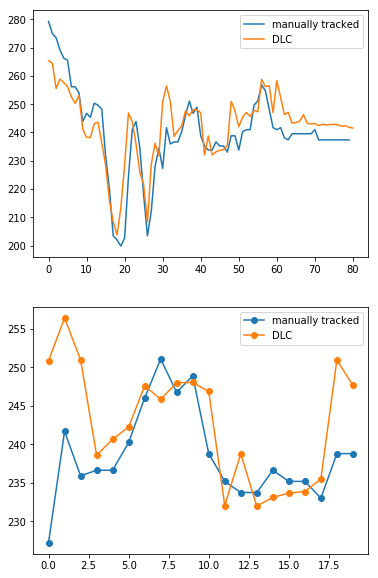

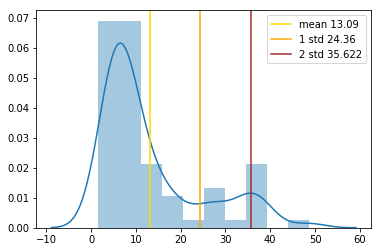

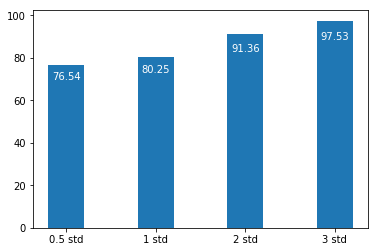

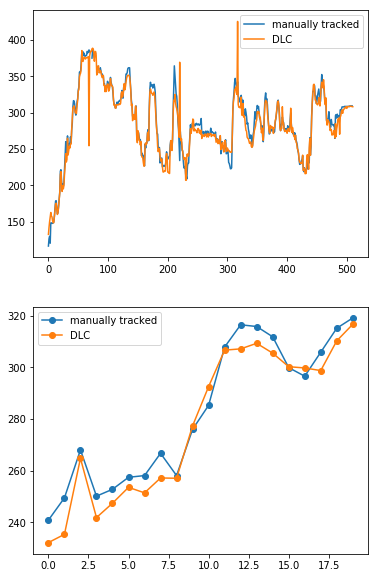

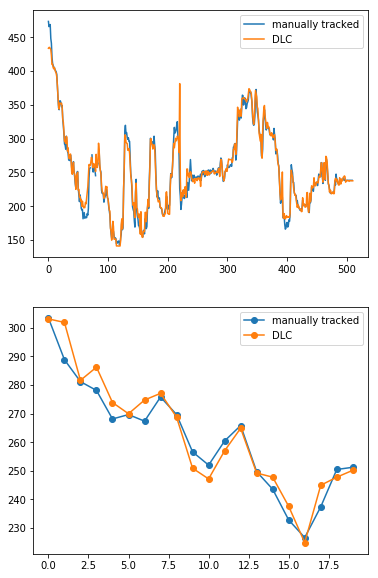

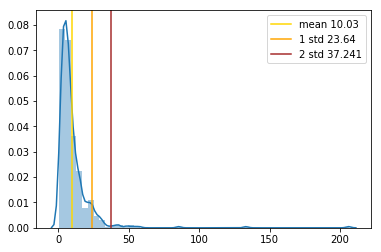

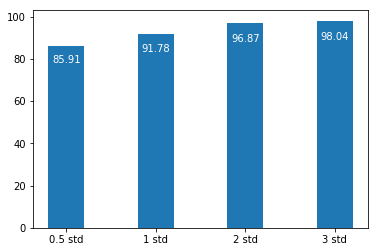

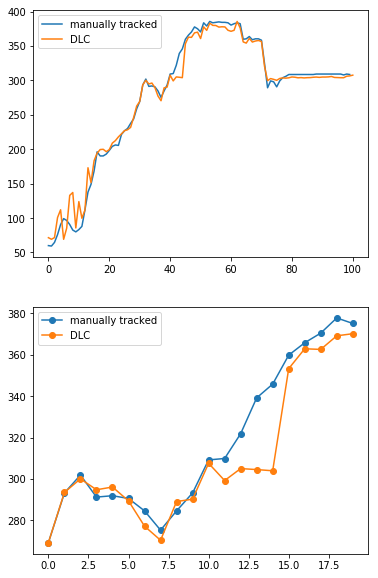

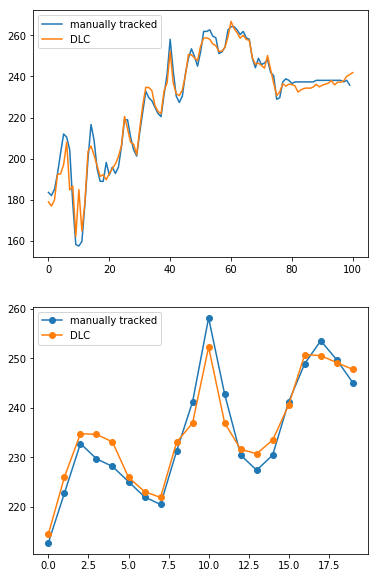

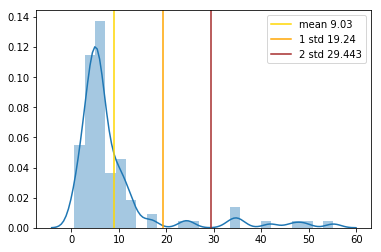

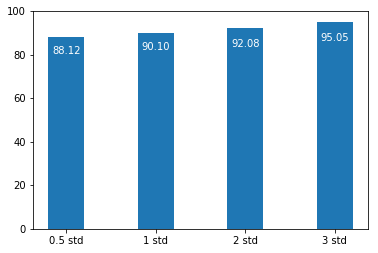

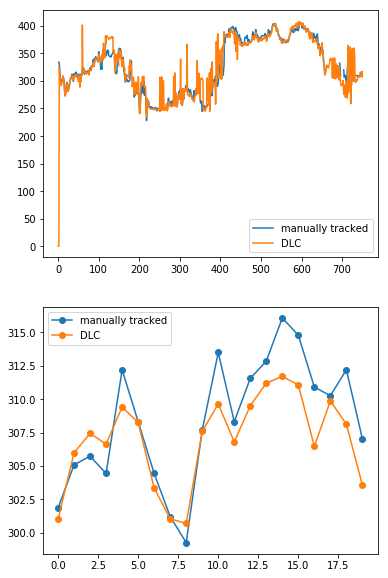

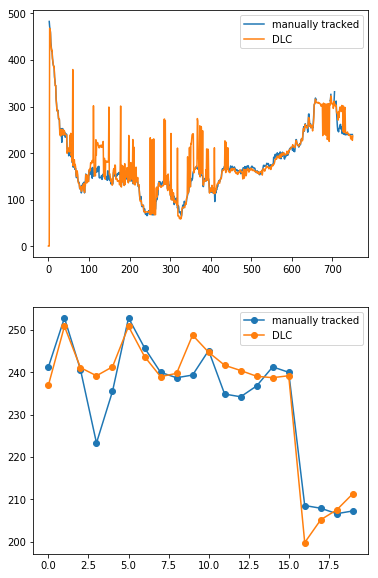

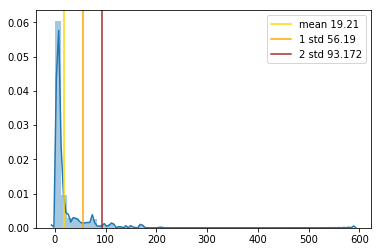

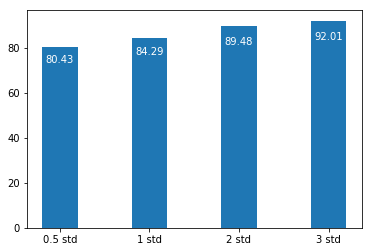

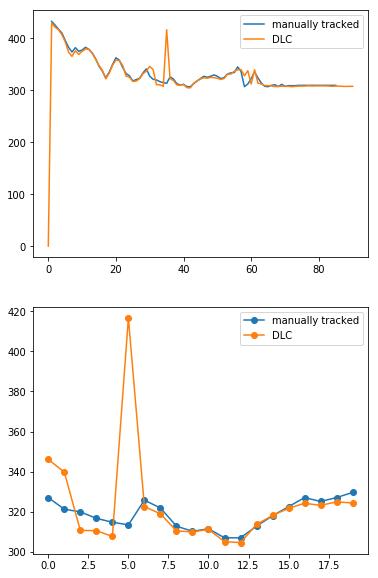

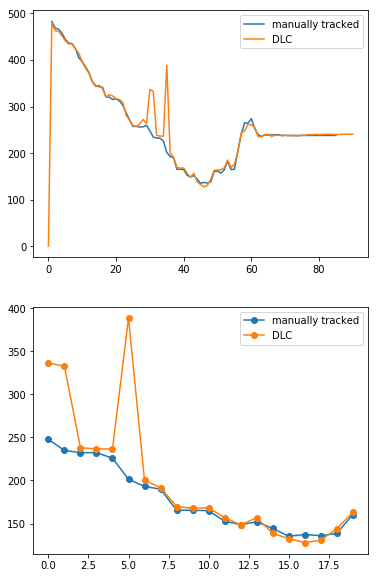

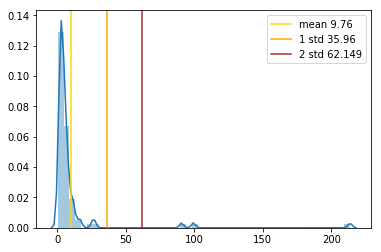

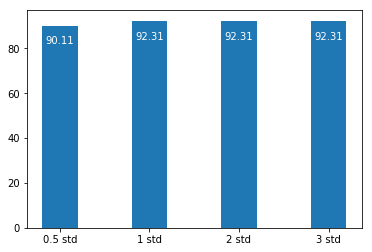

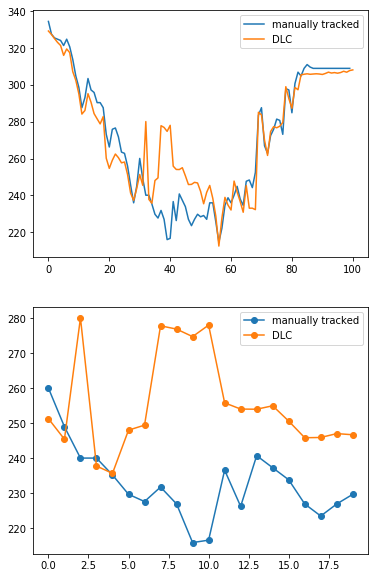

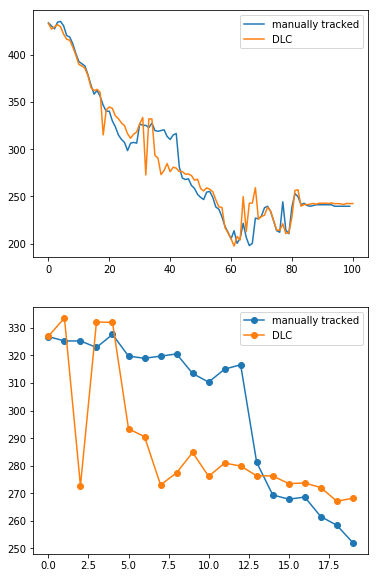

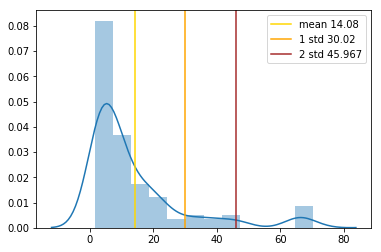

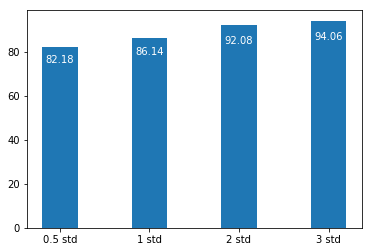

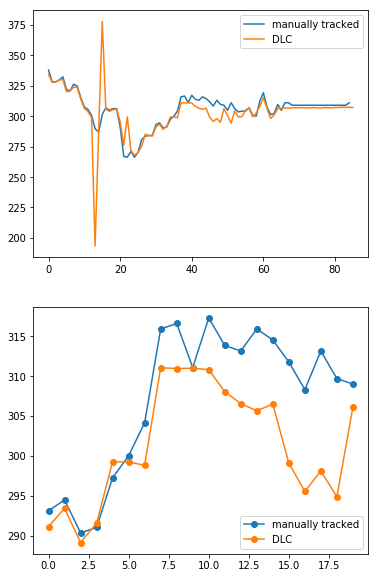

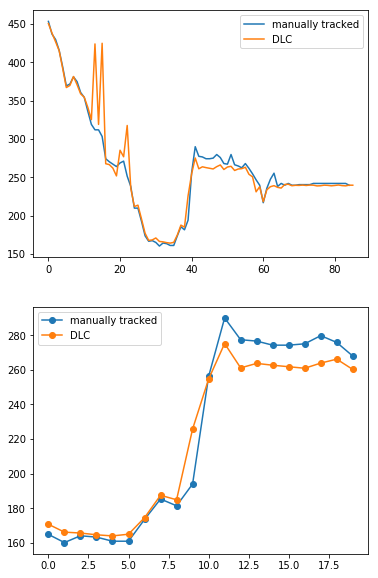

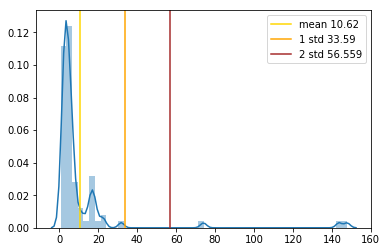

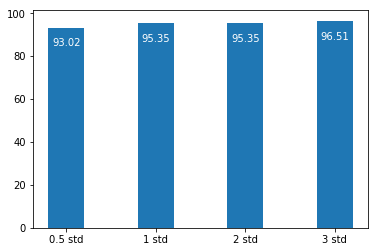

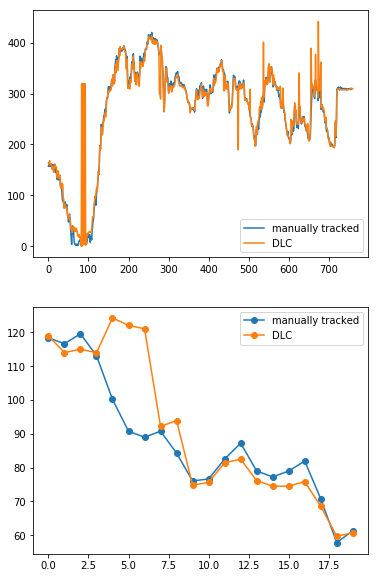

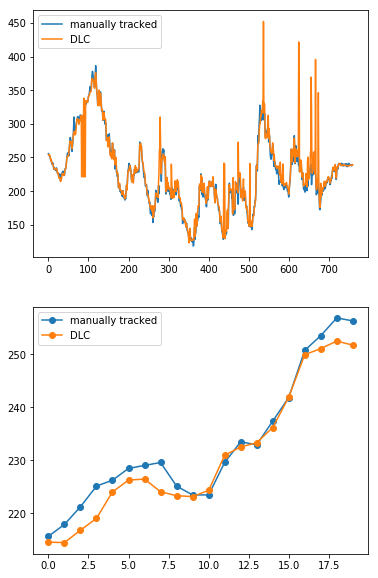

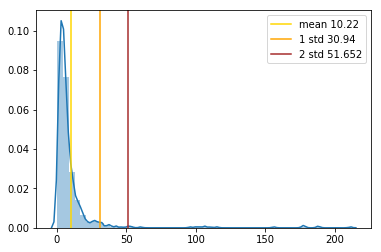

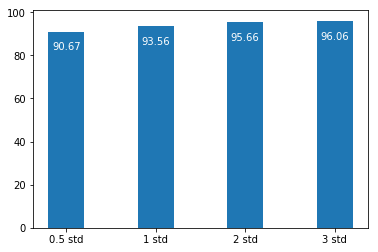

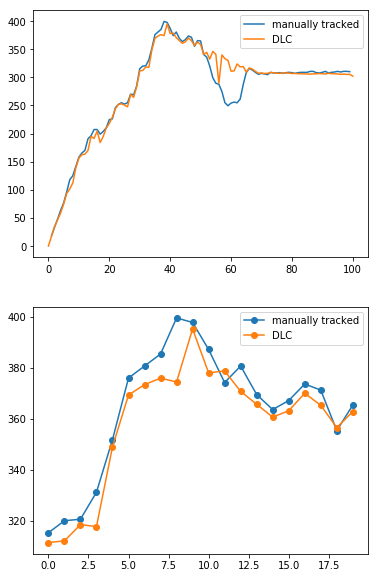

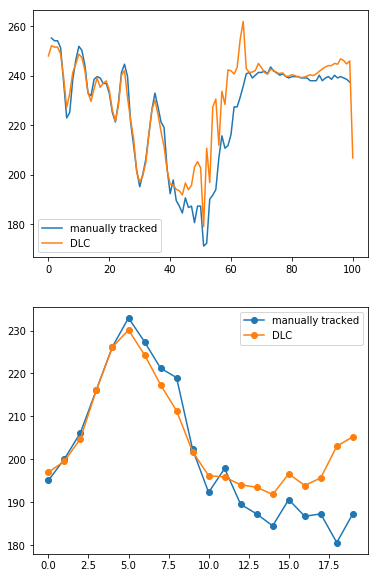

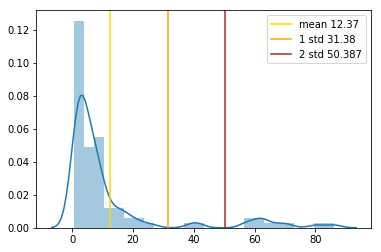

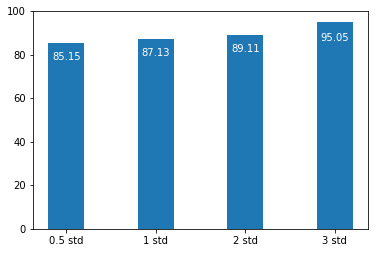

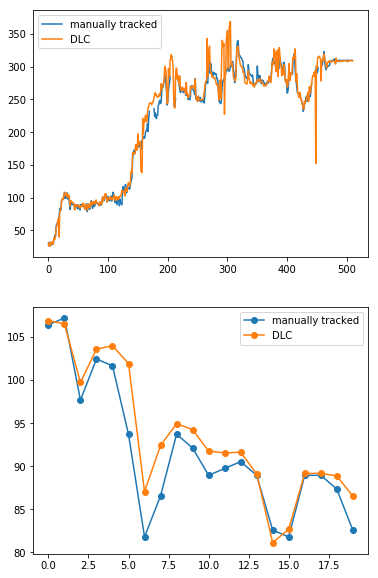

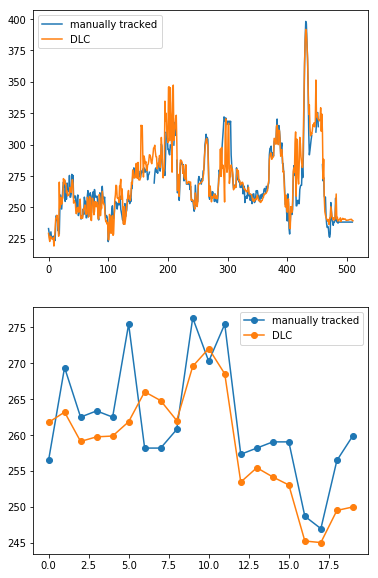

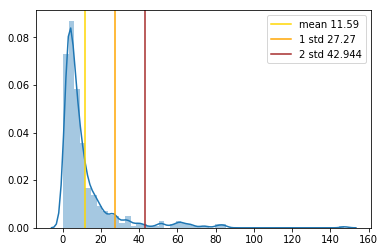

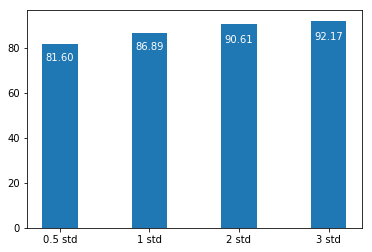

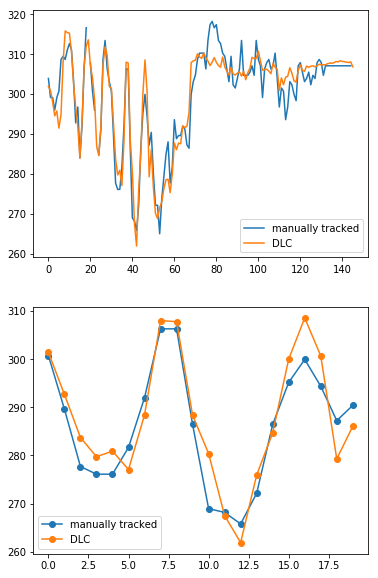

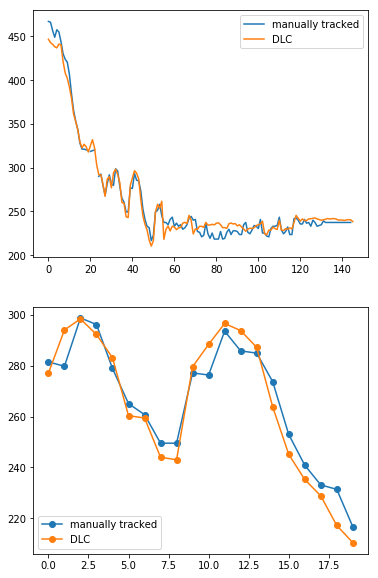

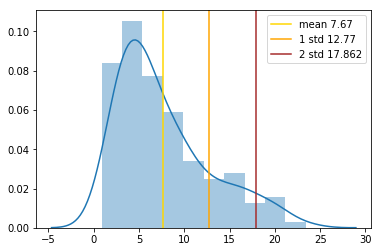

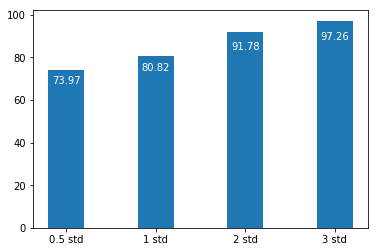

In [11]:
for fname in name:
    dlc_track, manual_track = GetRelevantTrackingData(fname)
    
#     for section in ['first', 'last']:
#         relevant_df = frame_Reference[(frame_Reference.Name == fname) & 
#                                           (frame_Reference.trial == section)]
#         fstart = relevant_df.loc[:,'Digitized Start'].values[0]
#         fstop = relevant_df.loc[:,'Digitized Stop'].values[0]

#         manual_x = manual_track.loc[fstart:fstop, 'pt4_cam1_X'].values
#         manual_y = manual_track.loc[fstart:fstop, 'pt4_cam1_Y'].values
#         manual_y = 488 - manual_y

#         idx = pd.IndexSlice
#         dlc_x = dlc_track.loc[idx[fstart:fstop], idx[:,:,'x']].values.squeeze()
#         dlc_y = dlc_track.loc[idx[fstart:fstop], idx[:,:,'y']].values.squeeze()
#         dlc_likelihood = dlc_track.loc[idx[fstart:fstop], idx[:,:,'likelihood']].values.squeeze()
        
        
#         error_manual = GetRMSE()
#         error_manual = no.concatenate
#         error = GetRMSE(dlc_x, dlc_y, manual_x, manual_y)
#         df = pd.DataFrame(data = error, columns = ['rmse'])
#         df['zscore'] = (df.rmse - df.rmse.mean())/df.rmse.std(ddof = 0)
        
#         fraction_included = []
#         for std in [0.5, 1, 2, 3]:
#             ff = len(df[df.zscore < std])/len(df.zscore)
#         #     ff = len(df[(df.zscore < std) & (df.zscore.notna())])/len(df[df.zscore.notna()])
#             fraction_included.append(ff)
            
#         s1 = pd.Series(data = manual_x, name = 'manual_x')
#         s2 = pd.Series(data = manual_y, name = 'manual_y')
#         s3 = pd.Series(data = dlc_x, name = 'dlc_x')
#         s4 = pd.Series(data = dlc_y, name = 'dlc_y')
#         s5 = pd.Series(data = dlc_likelihood, name = 'dlc_likelihood')
        
#         compiled_df = pd.concat([s1, s2, s3, s4, s5], axis = 1).reset_index()
#         compiled_df = pd.concat([compiled_df, df], axis = 1).reset_index()
        
#         compiled_df.to_csv('../dataFolders/Tracking Errors/' + fname + '_' + section + '.csv', 
#                            index = False)

        # export figure path = 
        export_fig_path = '../dataFolders/Figures/Tracking Errors/' + fname + '\\'
        try:
            os.mkdir(export_fig_path)
        except OSError:
            print('could not create %s path' %export_fig_path)
        
        fx,_ = DrawTracks(manual_x, dlc_x, 30, 50)
        fx.savefig(export_fig_path + '\\xDirection_' + section + '.png')
        
        fy, _ = DrawTracks(manual_y, dlc_y, 30, 50)
        fy.savefig(export_fig_path + '\\yDirection_' + section + '.png')
        
        fdist, _ = DrawDistribution(error, df)
        fdist.savefig(export_fig_path + '\\rmse_' + section + '.png')
        
        xticklabel = ['0.5 std', '1 std', '2 std', '3 std']
        ffractions, _ = DrawFractions(fraction_included, xticklabel)
        ffractions.savefig(export_fig_path + '\\fractionIncuded_' + section + '.png')

In [56]:
df = pd.DataFrame(data = uber_error, columns = ['rmse'])
df['zscore'] = (df.rmse - df.rmse.mean())/df.rmse.std(ddof = 0)

fraction_included = []

for std in [0.5, 1, 2, 3]:
    ff = len(df[df.zscore < std])/len(df.zscore)
#     ff = len(df[(df.zscore < std) & (df.zscore.notna())])/len(df[df.zscore.notna()])
    fraction_included.append(ff)

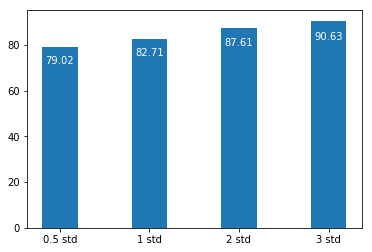

In [58]:
xticklabel = ['0.5 std', '1 std', '2 std', '3 std']
ffractions, _ = DrawFractions(fraction_included, xticklabel)
# ffractions.savefig('../dataFolders/Figures/Tracking Errors/' + 'Fraction_AllData_withNaNs.png')